<a href="https://colab.research.google.com/github/adalahardana/hasil-kuliah/blob/main/regresi_dataposyandu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# ====== Segment 1: Import & Load ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()


df = pd.read_excel("DataNewStatistika.xlsx")
print("Data awal:")
display(df.head())


Saving DataNewStatistika.xlsx to DataNewStatistika (1).xlsx
Data awal:


,nama_balita,jenis_kelamin,nama_ayah,nama_ibu,tanggal_lahir,RT,posyandu,tahun1,tahun2,tahun3,tahun4,tahun5,riwayat_penyakit,status
0,Asifa Putri,P,Cipto Saputra,Mega Saputri,2008-06-16,4,Posyandu Tulip,8.5,11.2,14.1,15.8,18.6,NaN,Sehat
1,Nadira,P,Agus Susanto,Sri Utomo,2015-10-26,5,Posyandu Melati,11.4,12.5,14.4,15.7,17.7,NaN,Sehat
2,Miftahul Nurul,P,Rahman Saputra,Lestari Firmansyah,2017-07-07,3,Posyandu Bugenvil,7.2,10.6,12.4,15.4,16.9,NaN,Sehat
3,Tania,P,Andi Santoso,Maya Firmansyah,2009-12-19,1,Posyandu Melati,11.7,14.1,14.9,16.9,19.2,NaN,Sehat
4,Hana,P,Galih Gunawan,Siska Wijaya,2009-04-26,4,Posyandu Bugenvil,9.1,11.6,12.5,14.8,18.3,NaN,Sehat



=== Statistik Deskriptif (Mean, Std, Min, Max, dll) ===


,count,mean,std,min,25%,50%,75%,max
tahun1,350.0,9.502286,1.043877,6.1,8.8,9.5,10.2,12.5
tahun2,350.0,11.976857,0.998886,9.2,11.3,11.9,12.6,15.0
tahun3,350.0,13.753714,1.039961,10.5,13.1,13.8,14.5,16.3
tahun4,350.0,15.544000,1.095082,11.5,14.8,15.6,16.3,18.6
tahun5,350.0,17.605429,1.152274,13.1,16.9,17.7,18.4,20.7



=== Statistik Tambahan (Median, Modus, Varians, Skewness, Kurtosis) ===


,mean,median,modus,varian,std_deviasi,skewness,kurtosis
tahun1,9.502286,9.5,9.7,1.089680,1.043877,-0.116549,-0.112193
tahun2,11.976857,11.9,11.6,0.997772,0.998886,0.151709,0.123576
tahun3,13.753714,13.8,13.9,1.081519,1.039961,-0.097450,-0.069921
tahun4,15.544000,15.6,15.8,1.199205,1.095082,-0.240604,0.288113
tahun5,17.605429,17.7,17.7,1.327735,1.152274,-0.238667,0.415776


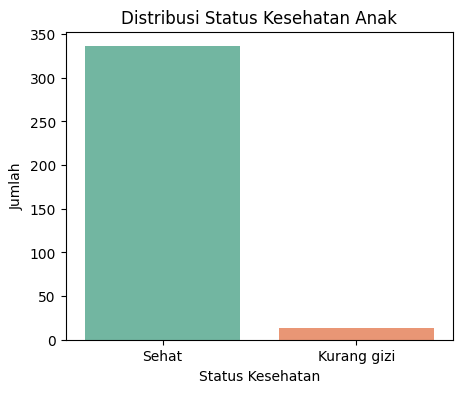

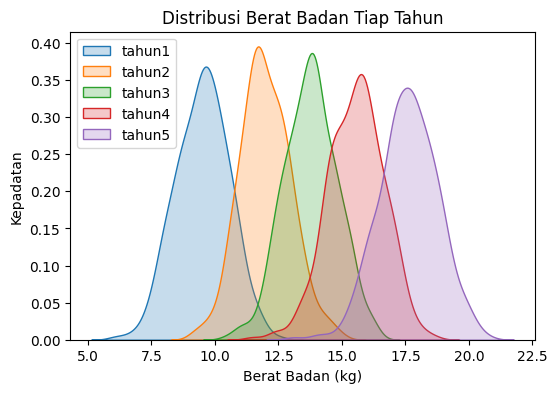

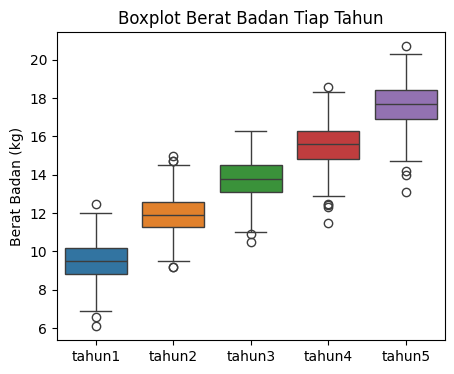

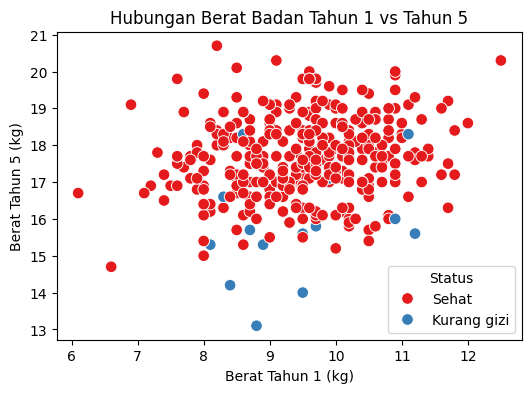

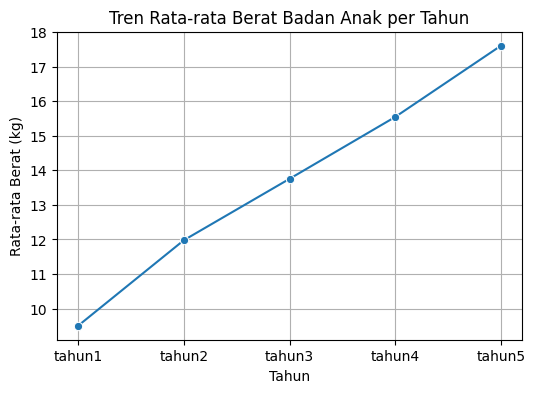

In [14]:
# ====== Segment 2: EDA ======

tahun_cols = ['tahun1','tahun2','tahun3','tahun4','tahun5']

# ===== Statistik Deskriptif =====
print("\n=== Statistik Deskriptif (Mean, Std, Min, Max, dll) ===")
display(df[tahun_cols].describe().T)

# ===== Statistik Tambahan =====
print("\n=== Statistik Tambahan (Median, Modus, Varians, Skewness, Kurtosis) ===")
stat_detail = pd.DataFrame({
    'mean': df[tahun_cols].mean(),
    'median': df[tahun_cols].median(),
    'modus': [df[c].mode()[0] for c in tahun_cols],
    'varian': df[tahun_cols].var(),
    'std_deviasi': df[tahun_cols].std(),
    'skewness': df[tahun_cols].skew(),
    'kurtosis': df[tahun_cols].kurt()
})
display(stat_detail)

# ===== Distribusi Status Kesehatan =====
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='status', palette='Set2')
plt.title('Distribusi Status Kesehatan Anak')
plt.xlabel('Status Kesehatan')
plt.ylabel('Jumlah')
plt.show()

# ===== Korelasi antar berat badan tiap tahun =====
#plt.figure(figsize=(5,4))
#sns.heatmap(df[tahun_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Korelasi Berat Badan Tiap Tahun')
#plt.show()

# ===== Distribusi Berat Badan per Tahun =====
plt.figure(figsize=(6,4))
for col in tahun_cols:
    sns.kdeplot(df[col], fill=True, label=col)
plt.title('Distribusi Berat Badan Tiap Tahun')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

# ===== Boxplot untuk Deteksi Outlier =====
plt.figure(figsize=(5,4))
sns.boxplot(data=df[tahun_cols])
plt.title('Boxplot Berat Badan Tiap Tahun')
plt.ylabel('Berat Badan (kg)')
plt.show()

# ===== Scatter Plot: Hubungan Tahun 1 vs Tahun 5 =====
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='tahun1', y='tahun5', hue='status', palette='Set1', s=70)
plt.title('Hubungan Berat Badan Tahun 1 vs Tahun 5')
plt.xlabel('Berat Tahun 1 (kg)')
plt.ylabel('Berat Tahun 5 (kg)')
plt.legend(title='Status')
plt.show()

# ===== Pairplot (ukuran default) =====
#sns.pairplot(df, vars=tahun_cols, hue='status', palette='husl', diag_kind='kde')
#plt.suptitle('Penyebaran Berat Badan Antar Tahun', y=1.02)
#plt.show()

# ===== Line Plot: Tren Rata-rata =====
mean_values = df[tahun_cols].mean()
plt.figure(figsize=(6,4))
sns.lineplot(x=tahun_cols, y=mean_values, marker='o')
plt.title('Tren Rata-rata Berat Badan Anak per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Berat (kg)')
plt.grid(True)
plt.show()


=== Outlier Handling (IQR Method) untuk Tahun 1–5 ===

Jumlah Outlier per Tahun:
tahun1: 3 outlier
tahun2: 5 outlier
tahun3: 2 outlier
tahun4: 5 outlier
tahun5: 4 outlier

✔ Outlier telah dibersihkan. Jumlah data setelah pembersihan: 335


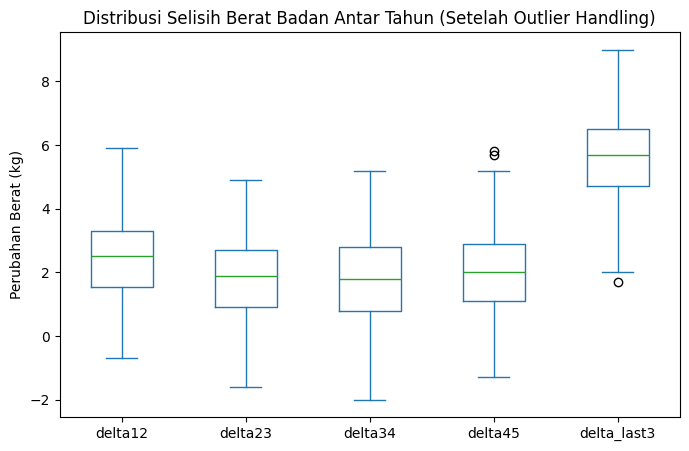

In [18]:
# ====== Segment 3: Outlier Handling + Fitur Selisih Berat Badan ======

print("=== Outlier Handling (IQR Method) untuk Tahun 1–5 ===")

tahun_cols = ['tahun1','tahun2','tahun3','tahun4','tahun5']

outlier_count = {}

# Deteksi dan hitung jumlah outlier per tahun
for col in tahun_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_count[col] = count

# Tampilkan jumlah outlier
print("\nJumlah Outlier per Tahun:")
for col, count in outlier_count.items():
    print(f"{col}: {count} outlier")

# ===== Bersihkan outlier (hapus baris berisi outlier) =====
df_clean = df.copy()
for col in tahun_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print("\n✔ Outlier telah dibersihkan. Jumlah data setelah pembersihan:", len(df_clean))

# Gunakan df_clean sebagai df yang baru
df = df_clean.reset_index(drop=True)


# ====== Hitung Fitur Selisih Antar Tahun ======
df['delta12'] = df['tahun2'] - df['tahun1']
df['delta23'] = df['tahun3'] - df['tahun2']
df['delta34'] = df['tahun4'] - df['tahun3']
df['delta45'] = df['tahun5'] - df['tahun4']

# Fitur tambahan: tren 3 tahun terakhir
df['delta_last3'] = df['tahun5'] - df['tahun2']  # perubahan berat dari tahun 2 → 5


# ====== Visualisasi Boxplot Fitur Delta ======
delta_cols = ['delta12','delta23','delta34','delta45','delta_last3']

df[delta_cols].plot(kind='box', figsize=(8,5))
plt.title('Distribusi Selisih Berat Badan Antar Tahun (Setelah Outlier Handling)')
plt.ylabel('Perubahan Berat (kg)')
plt.show()


In [20]:
# ====== Segment 4: Preprocessing ======

print("=== PREPROCESSING DATA ===")

# ==============================
# 1. Handling Missing Values
# ==============================

# Kolom yang dicek missing value
missing_cols = ['riwayat_penyakit']

print("\n[1] Missing Value Sebelum Perbaikan:")
print(df[missing_cols].isnull().sum())

# Perbaikan missing value
df['riwayat_penyakit'] = df['riwayat_penyakit'].fillna('')

print("\n[1] Missing Value Setelah Perbaikan:")
print(df[missing_cols].isnull().sum())

print("✔ Missing value pada kolom terkait sudah diperbaiki.\n")


# ==============================
# 2. Feature Engineering (Fitur Tambahan)
# ==============================
df['punya_penyakit'] = np.where(
    df['riwayat_penyakit'].astype(str).str.strip() == '',
    0,
    1
)


# ==============================
# 3. Label Encoding (Target)
# ==============================
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])


# ==============================
# 4. Pilih Fitur yang Digunakan
# ==============================
feature_cols = [
    'delta12', 'delta23', 'delta34', 'delta45',
    'delta_last3',
    'punya_penyakit'
]

X = df[feature_cols]
y = df['status']

print("[2] Fitur yang digunakan untuk modeling:")
print(feature_cols, "\n")


# ==============================
# 5. Standardisasi Fitur Numerik
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✔ Standardisasi fitur selesai.")
print("✅ Preprocessing selesai, data siap digunakan untuk modeling.")


=== PREPROCESSING DATA ===

[1] Missing Value Sebelum Perbaikan:
riwayat_penyakit    0
dtype: int64

[1] Missing Value Setelah Perbaikan:
riwayat_penyakit    0
dtype: int64
✔ Missing value pada kolom terkait sudah diperbaiki.

[2] Fitur yang digunakan untuk modeling:
['delta12', 'delta23', 'delta34', 'delta45', 'delta_last3', 'punya_penyakit'] 

✔ Standardisasi fitur selesai.
✅ Preprocessing selesai, data siap digunakan untuk modeling.


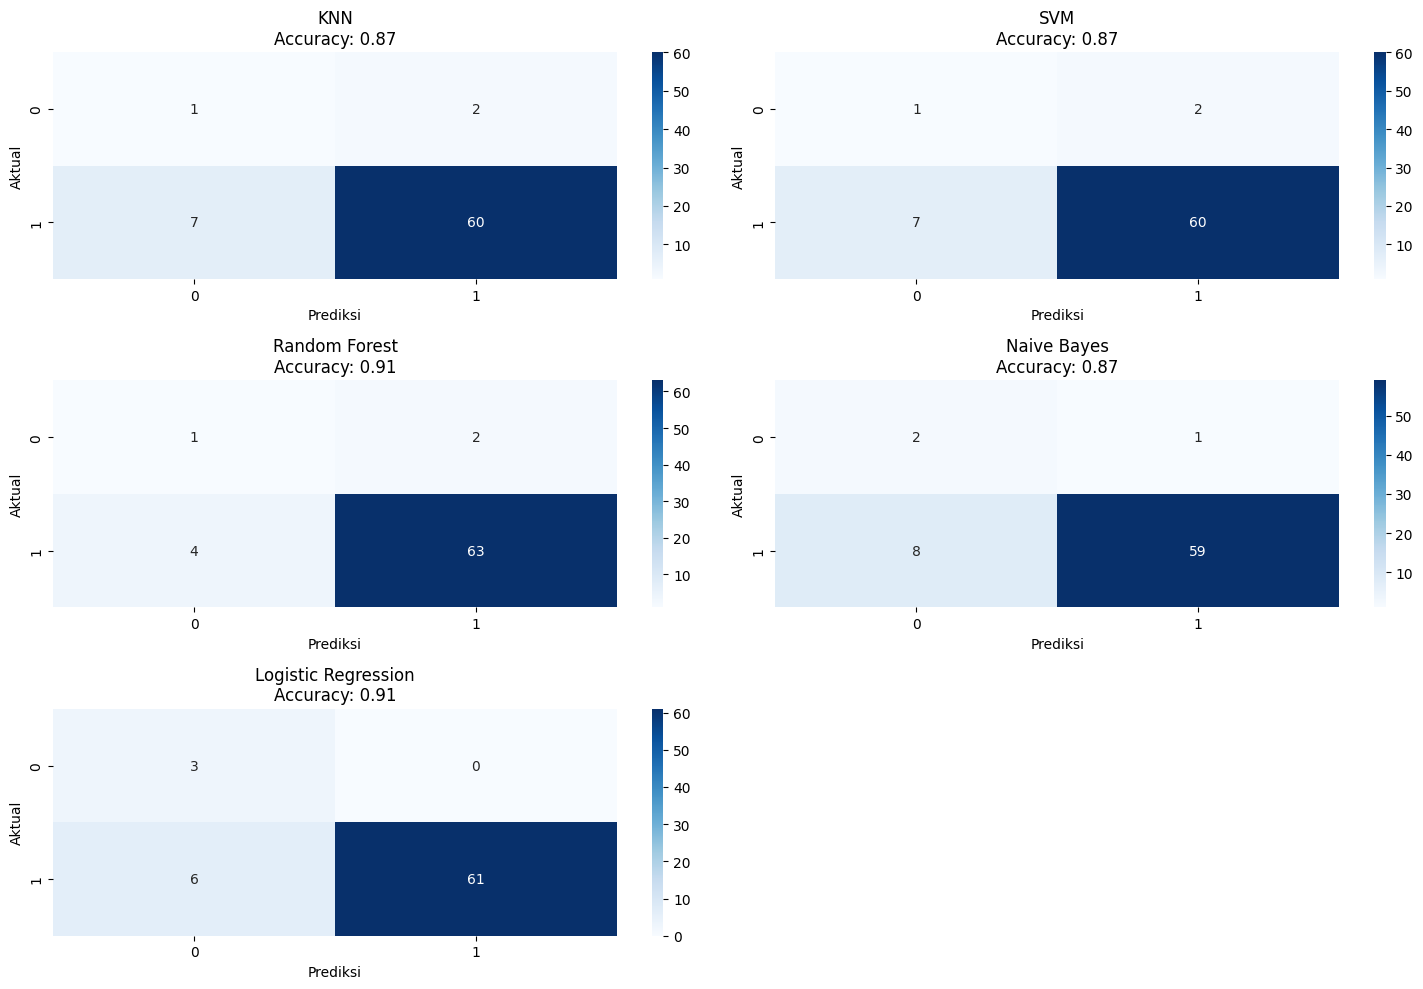

In [17]:
# ====== Segment 5: Modeling (Balanced dengan SMOTE) ======
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data sebelum oversampling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Definisikan model
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(class_weight='balanced')
}

# Training dan evaluasi
results = {}
plt.figure(figsize=(15,10))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3,2,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nAccuracy: {acc:.2f}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

plt.tight_layout()
plt.show()


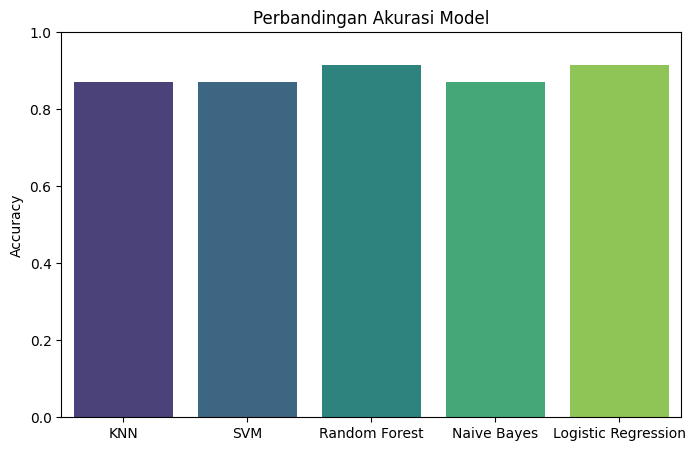

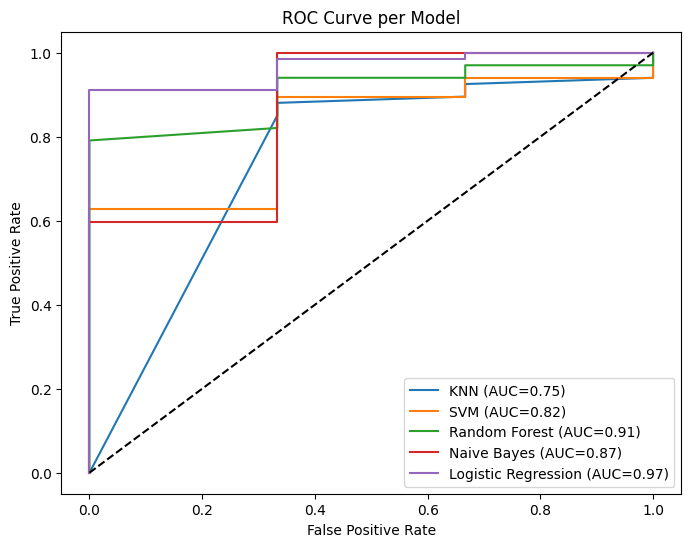

In [22]:
# ====== Segment 6: Evaluasi ======
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve per Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


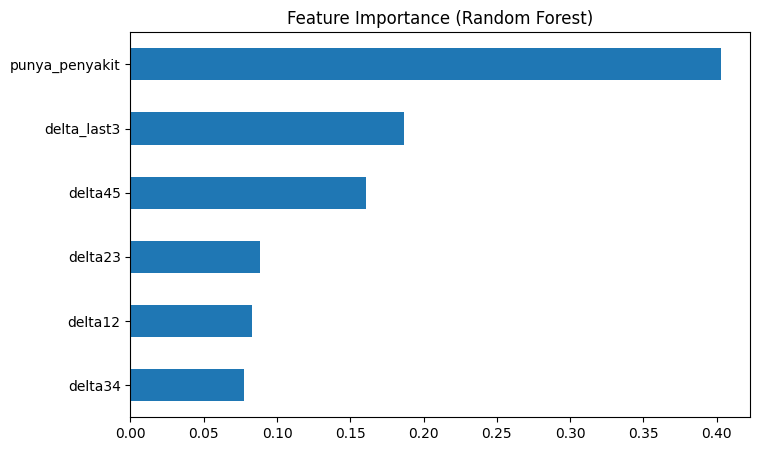


Feature importance menunjukkan variabel yang paling berpengaruh terhadap status kesehatan:


,0
punya_penyakit,0.402970
delta_last3,0.186661
delta45,0.160831
delta23,0.088726
delta12,0.083232
delta34,0.077580


In [23]:
# ====== Segment 7: Interpretasi ======
rf = models['Random Forest']
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.show()

print("\nFeature importance menunjukkan variabel yang paling berpengaruh terhadap status kesehatan:")
display(feat_importances.sort_values(ascending=False))


In [25]:
# ====== Segment 8: Prediksi Status Kesehatan ======
def predict_status(t1, t2, t3, t4, t5, riwayat):
    """
    Prediksi status kesehatan menggunakan Random Forest dengan fitur delta_last3 dan punya_penyakit.
    """
    # Hitung selisih antar tahun
    delta12 = t2 - t1
    delta23 = t3 - t2
    delta34 = t4 - t3
    delta45 = t5 - t4
    delta_last3 = t5 - t2

    # Konversi riwayat penyakit → 1 (ada penyakit), 0 (tidak ada)
    punya_penyakit = 1 if riwayat.strip() != '' else 0

    # Susun input untuk model (6 fitur)
    X_input = np.array([[delta12, delta23, delta34, delta45, delta_last3, punya_penyakit]])
    X_input_scaled = scaler.transform(X_input)

    # Prediksi menggunakan model Random Forest
    model = models['Random Forest']
    y_pred = model.predict(X_input_scaled)
    y_proba = model.predict_proba(X_input_scaled)[0]

    # Decode label
    status_pred = le.inverse_transform(y_pred)[0]
    status_text = "Sehat" if status_pred == 1 else "Kurang Sehat"

    return status_text, y_proba

# --- Contoh uji interaktif ---
t1 = float(input("Masukkan berat Tahun 1 (kg): "))
t2 = float(input("Masukkan berat Tahun 2 (kg): "))
t3 = float(input("Masukkan berat Tahun 3 (kg): "))
t4 = float(input("Masukkan berat Tahun 4 (kg): "))
t5 = float(input("Masukkan berat Tahun 5 (kg): "))
riwayat = input("Masukkan riwayat penyakit (kosongkan jika tidak ada): ")

status, proba = predict_status(t1, t2, t3, t4, t5, riwayat)

print(f"\n🔍 Prediksi Status Kesehatan: {status}")
print(f"Probabilitas Sehat       : {proba[1]:.2f}")
print(f"Probabilitas Kurang Sehat: {proba[0]:.2f}")


Masukkan berat Tahun 1 (kg): 12
Masukkan berat Tahun 2 (kg): 13
Masukkan berat Tahun 3 (kg): 13
Masukkan berat Tahun 4 (kg): 15
Masukkan berat Tahun 5 (kg): 17
Masukkan riwayat penyakit (kosongkan jika tidak ada): 

🔍 Prediksi Status Kesehatan: Sehat
Probabilitas Sehat       : 0.90
Probabilitas Kurang Sehat: 0.10
